<h1>Importing the Genome</h1>
<p>This notebook will serve as my personal introduction to jupyter notebooks and to biopython. Markups provided are both intended for readers, as well as for my own personal use</p>
<p>The genome for the novel coronavirus was obtained from the <a href="https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta">National Center for Biotechnology Information</a></p>

In [28]:
genome = open(r"C:\Users\drake\OneDrive\Desktop\Desktop\programs_practice\python\corona\covidGenome1.fasta", 'r')

nucleotides = genome.read()

genome.close()

<h2>Open and read the genome for parsing</h2> <p>Notice that the first line of the .fasta does not contain sequence data and should be removed. I use a while loop to return the position corresponding to the start of the nucleotide sequence, and then remove the first part of my sequence up until the index returned in the while loop. This should give me a string corresponding to the entirety of the nucleotide sequence. </p>
<p>There is still one thing that we need to take care of, the escape characters (white spaces, line breaks in the original sequence file). To get rid of these, use python's builtin replace method. You can run your own little tests to make sure that the nucleotide sequence is parsed to your liking; I used another loop but this is computationally intense and I wouoldn't do this on my own machine. Additionally, biopython probably has some failsafes in place to keep your sequences smooth.</p>

In [59]:
i = 0
while nucleotides[i] != 'A': 
    i += 1
nucleotidesWithSpace = nucleotides[i:]
dna = nucleotidesWithSpace.replace('\n', "")
dnaNucleotides = ["A", "T", "G", "C"]
for i in dna: 
    if i not in dnaNucleotides: 
        print('fail ' + i) 

<h2>GC Content and Nucleotide Usage</h2>
<p><a href="https://en.wikipedia.org/wiki/GC-content">GC content</a> is associated with genome stability and its calculation will be used to check the accuracy of our genome. The GC content of our working genome came out to be 38%, which is also the median GC percentage of <a href="https://www.ncbi.nlm.nih.gov/genome?LinkName=nuccore_genome&from_uid=1798172431"> the reference genome on NCBI </a>. The GC Content could be calculated using a for loop and running tallies, but BioPython makes this process easier. Using the Sequence Utilities, we can quickly calculate GC content in one line of code.</p>

In [88]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
from Bio.Alphabet import IUPAC
from Bio.SeqUtils import GC
print('GC Content = ' + str(round(GC(my_dna), 3)) + '%')

GC Content = 37.973%


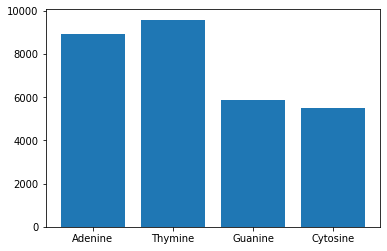

In [93]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [(Seq(str(my_dna),generic_dna).count('A')), (Seq(str(my_dna),generic_dna).count('T')), (Seq(str(my_dna),generic_dna).count('G')), (Seq(str(my_dna),generic_dna).count('C'))]
plt.bar(['Adenine', 'Thymine', 'Guanine', 'Cytosine'], data)
plt.show()

<h1>Transcription/Translation</h1>
<p>Our current genome is in the form of DNA nucleotides. If you are unfamiliar with <a href="https://sandwalk.blogspot.com/2007/01/central-dogma-of-molecular-biology.html">The Central Dogma of Molecular Biology</a>, I highly reccomend you take ksome time to get familiar with it before moving on with sequence data (especially if you want to make sense of your sequence data or convince others of your findings). In the briefest of summaries, DNA gets transcribed into RNA, and RNA is then translated into functional protein. Again, this is an incredibly brief summary, so I highly reccomend going over it in more detail.</p>